### Extração e clonagem

In [1]:
import pandas as pd
import numpy as np


In [2]:
url = "https://info.dengue.mat.br/api/alertcity"
geocode = 4205407
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2023
ey_end = 2023

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp = "?".join([url, params])
url_resp

'https://info.dengue.mat.br/api/alertcity?&disease=dengue&geocode=4205407&disease=dengue&format=csv&ew_start=1&ew_end=53&ey_start=2023&ey_end=2023'

In [3]:
dados = pd.read_csv(url_resp, index_col='SE')
dados.T

SE,202352,202351,202350,202349,202348,202347,202346,202345,202344,202343,...,202310,202309,202308,202307,202306,202305,202304,202303,202302,202301
data_iniSE,2023-12-24,2023-12-17,2023-12-10,2023-12-03,2023-11-26,2023-11-19,2023-11-12,2023-11-05,2023-10-29,2023-10-22,...,2023-03-05,2023-02-26,2023-02-19,2023-02-12,2023-02-05,2023-01-29,2023-01-22,2023-01-15,2023-01-08,2023-01-01
casos_est,299.0,358.0,366.0,313.0,256.0,182.0,156.0,194.0,159.0,165.0,...,1205.0,631.0,301.0,220.0,185.0,112.0,93.0,73.0,80.0,72.0
casos_est_min,299,358,366,313,256,182,156,194,159,165,...,1205,631,301,220,185,112,93,73,80,72
casos_est_max,299,358,366,313,256,182,156,194,159,165,...,1205,631,301,220,185,112,93,73,80,72
casos,299,358,366,313,256,182,156,194,159,165,...,1205,631,301,220,185,112,93,73,80,72
p_rt1,0.055735,0.979853,0.999998,1.0,0.999939,0.682068,0.24957,0.951224,0.507519,0.706721,...,1.0,1.0,1.0,1.0,1.0,0.987067,0.910287,0.547497,0.875573,0.821939
p_inc100k,52.07245,62.347614,63.740856,54.510624,44.583767,31.696274,27.168234,33.786137,27.6907,28.735632,...,209.8572,109.89202,52.42076,38.314175,32.21874,22.011454,18.277369,14.346751,15.722467,14.15022
Localidade_id,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nivel,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
id,420540720235219815,420540720235119815,420540720235019815,420540720234919815,420540720234819815,420540720234719815,420540720234619815,420540720234519815,420540720234419815,420540720234319815,...,420540720231019795,420540720230919787,420540720230819780,420540720230719774,420540720230619768,420540720230519760,420540720230419752,420540720230319748,420540720230219748,420540720230119741


### Evolução de casos de dengue

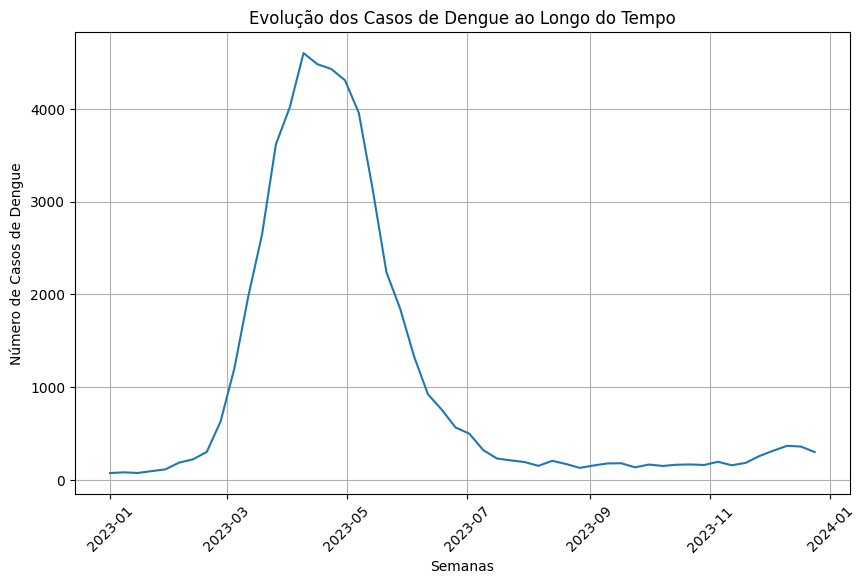

In [4]:
import matplotlib.pyplot as plt

dados['data_iniSE'] = pd.to_datetime(dados['data_iniSE'])
dados = dados.sort_values('data_iniSE')

# Plotando a evolução dos casos de dengue ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(dados['data_iniSE'], dados['casos'])
plt.xlabel('Semanas')
plt.ylabel('Número de Casos de Dengue')
plt.xticks(rotation=45)
plt.title('Evolução dos Casos de Dengue ao Longo do Tempo')
plt.grid(True)
plt.show()

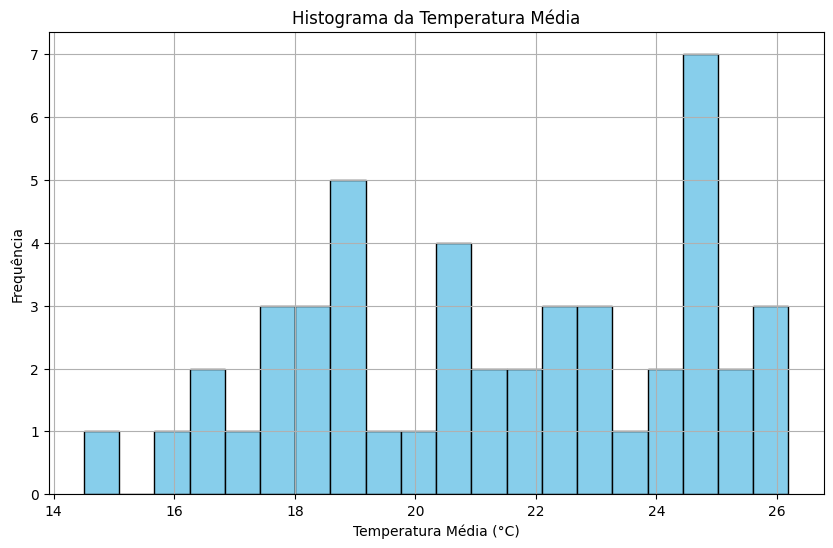

In [5]:
# Plotando o histograma da temperatura média
plt.figure(figsize=(10, 6))
plt.hist(dados['tempmed'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência')
plt.title('Histograma da Temperatura Média')
plt.grid(True)
plt.show()

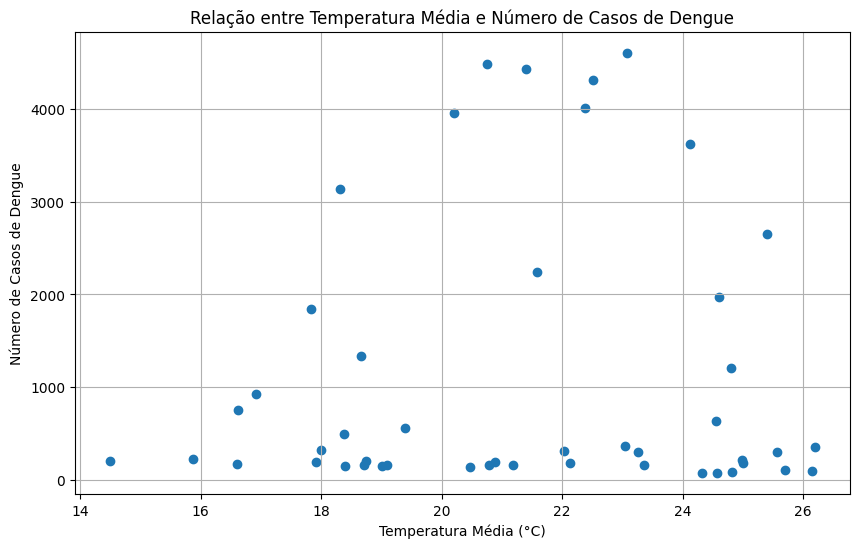

In [6]:
# Plotando o gráfico de dispersão entre temperatura média e número de casos de dengue
plt.figure(figsize=(10, 6))
plt.scatter(dados['tempmed'], dados['casos'])
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Número de Casos de Dengue')
plt.title('Relação entre Temperatura Média e Número de Casos de Dengue')
plt.grid(True)
plt.show()


In [7]:
np.any(np.isnan(x))

NameError: name 'x' is not defined

In [16]:
import statsmodels.api as sm
import numpy as np

# Remover linhas com valores infinitos ou ausentes em 'tempmed' e 'casos'
dados_limpos = dados.dropna(subset=['tempmed', 'casos'])
dados_limpos = dados_limpos.replace([np.inf, -np.inf], np.nan).dropna(subset=['tempmed', 'casos'])

# Adicionar uma constante ao x para estimar o teimport statsmodels.api as sm

# Ajustando o modelo de regressão linear
x = sm.add_constant(dados['tempmed'])
y = dados['casos']
modelo = sm.OLS(y, x).fit()

# Exibindo os resultados da regressão
print(modelo.summary())
x = sm.add_constant(dados_limpos['tempmed'])
y = dados_limpos['casos']

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, x).fit()

# Exibir os resultados da regressão
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  casos   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2223
Date:                Thu, 04 Apr 2024   Prob (F-statistic):              0.640
Time:                        17:48:33   Log-Likelihood:                -409.34
No. Observations:                  47   AIC:                             822.7
Df Residuals:                      45   BIC:                             826.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        413.2591   1511.940      0.273      0.7

In [ ]:
print(dados.columns)

Index(['data_iniSE', 'casos_est', 'casos_est_min', 'casos_est_max', 'casos',
       'p_rt1', 'p_inc100k', 'Localidade_id', 'nivel', 'id', 'versao_modelo',
       'tweet', 'Rt', 'pop', 'tempmin', 'umidmax', 'receptivo', 'transmissao',
       'nivel_inc', 'umidmed', 'umidmin', 'tempmed', 'tempmax', 'casprov',
       'casprov_est', 'casprov_est_min', 'casprov_est_max', 'casconf',
       'notif_accum_year'],
      dtype='object')


### Número de casos por semana

In [ ]:
this_week = dados.index.max()
last_week = this_week - 1
cases_this_week = dados.loc[this_week]['casos_est']
cases_last_week = dados.loc[last_week]['casos_est']

print(dados.loc[this_week:].T)

SE                            202352              202351              202350  \
data_iniSE                2023-12-24          2023-12-17          2023-12-10   
casos_est                      299.0               358.0               366.0   
casos_est_min                    299                 358                 366   
casos_est_max                    299                 358                 366   
casos                            299                 358                 366   
p_rt1                       0.055735            0.979853            0.999998   
p_inc100k                   52.07245           62.347614           63.740856   
Localidade_id                      0                   0                   0   
nivel                              4                   4                   4   
id                420540720235219815  420540720235119815  420540720235019815   
versao_modelo             2024-04-02          2024-04-02          2024-04-02   
tweet                            0.0    

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot


trace1  = go.Scatter(
        mode='lines+markers',
        x=dados.index.map(
            lambda v: '%s' % (str(v)[-6:])
        ),
        y=dados['casos_est'],
        name="Casos estimados",
        marker_color='#1A5CF4',
        hovertemplate=(
            '%{text}' +
            '<br>' +
            '%{y:1f} Casos estimados' +
            '<extra></extra>'
        ),
        text="SE: " + dados.index.map(lambda v: '{}'.format(str(v)[-2:]))  + 
             "<br>" + 
             "Data: " + dados.data_iniSE.loc[dados.index],  
        )
  

trace2 = go.Bar(
        x=dados.index.map(
            lambda v: '%s' % (str(v)[-6:])
        ),
        y=dados['casos'],
        name="Casos reportados",
        marker_color ='#BAF3FE',
        marker_line_color='rgb(8,48,107)',
        opacity=0.5,
        hovertemplate=(
            '%{text}' +
            '<br>' +
            '%{y:1f} Casos reportados' +
            '<extra></extra>'
        ),
        text="SE: " + dados.index.map(lambda v: '{}'.format(str(v)[-2:]))  + 
             "<br>" + 
             "Date: " + dados.data_iniSE.loc[dados.index],  
    )

trace3 = go.Indicator(
    mode = "number+delta",
    value = cases_this_week,
    delta={
        'reference': cases_last_week,
        'increasing': {'color': "#e60000"},
        'decreasing': {'color': "#1e824c"},
        "font": {"size": 36},
    },
    title = {
        "text": "SE:{} <br> Casos estimados".format(
            str(this_week)[-2:]
        )
    },
    domain = {'y': [0, 1], 'x': [0.25, 0.75]}
)

data = [trace1, trace2, trace3]

layout = go.Layout(
    title_text='Casos de dengue estimados e reportados em Florianópolis - SC',
    yaxis=dict(
        title_text='Número de casos',
        side = 'left',
        showline=False,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=0,
        gridcolor='rgb(176, 196, 222)',
    ),
    xaxis=dict(
        title_text='Semana epidemiológica',
        showline=False,
        showgrid=True,
        showticklabels=True,
        tickangle=-60,
        linecolor='rgb(204, 204, 204)',
        linewidth=0,
        gridcolor='rgb(176, 196, 222)',

    ),
    showlegend=False,
    plot_bgcolor='rgb(255, 255, 255)',
    paper_bgcolor='rgb(245, 246, 249)',
    autosize=True,
)


fig = go.Figure(data=data, layout=layout)
fig.show()

### Estudo relacional de Casos/Temperatura/Umidade para o pico de casos

In [ ]:
dados_sem_linha = dados.drop(dados.index[0])

In [ ]:
import matplotlib.pyplot as plt

# Filtrar as semanas e a temperatura máxima
filtered_data = dados_sem_linha.loc[week_filter, ['SE', 'tempmax']]

# Ordenar os dados pela semana
filtered_data = filtered_data.sort_values('SE')

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['SE'], filtered_data['tempmax'])
plt.xlabel('Semana')
plt.ylabel('Temperatura Máxima')
plt.title('Temperatura Máxima por Semana')
plt.xticks(rotation=45)
plt.show()

NameError: name 'week_filter' is not defined

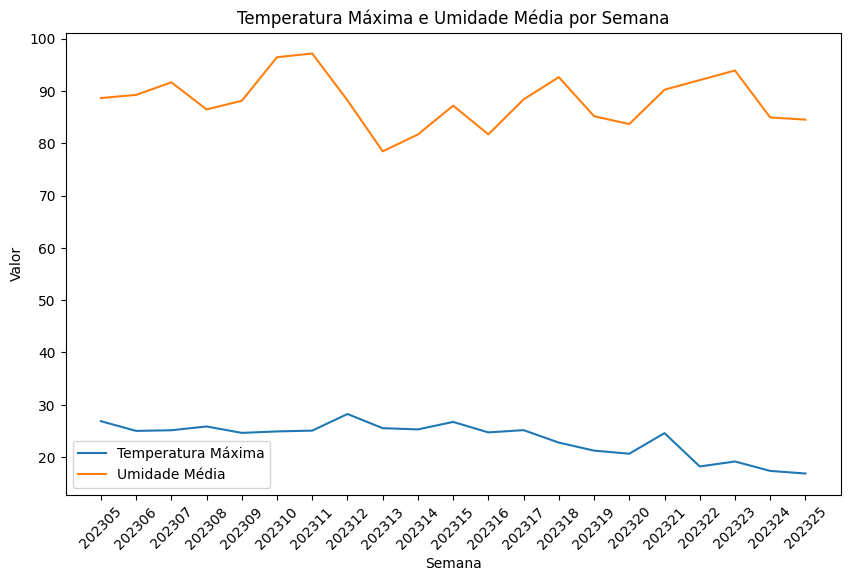

In [ ]:
import matplotlib.pyplot as plt

# Filtrar as semanas, a temperatura máxima e a umidade média
filtered_data = dados_sem_linha.loc[week_filter, ['SE', 'tempmax', 'umidmed']]

# Ordenar os dados pela semana
filtered_data = filtered_data.sort_values('SE')

plt.figure(figsize=(10, 6))

# Plotar a temperatura máxima
plt.plot(filtered_data['SE'], filtered_data['tempmax'], label='Temperatura Máxima')

# Plotar a umidade média
plt.plot(filtered_data['SE'], filtered_data['umidmed'], label='Umidade Média')

plt.xlabel('Semana')
plt.ylabel('Valor')
plt.title('Temperatura Máxima e Umidade Média por Semana')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
dados_sem_linha = dados.iloc[1:]

In [ ]:
dados_sem_linha['SE'] = dados_sem_linha['SE'].astype(str)
week_filter = (dados_sem_linha['SE'] >= '202305') & (dados_sem_linha['SE'] <= '202325')

KeyError: 'SE'

In [ ]:
tempmax_filtered = dados_sem_linha.loc[week_filter, 'tempmed']
variation = tempmax_filtered.max() - tempmax_filtered.min()
print(variation)

9.070476


In [ ]:
# Filtrar as semanas e a temperatura máxima
filtered_data = dados_sem_linha.loc[week_filter, ['SE', 'tempmax', 'umidmed']]
# Ordenar os dados pela semana
filtered_data = filtered_data.sort_values('SE')




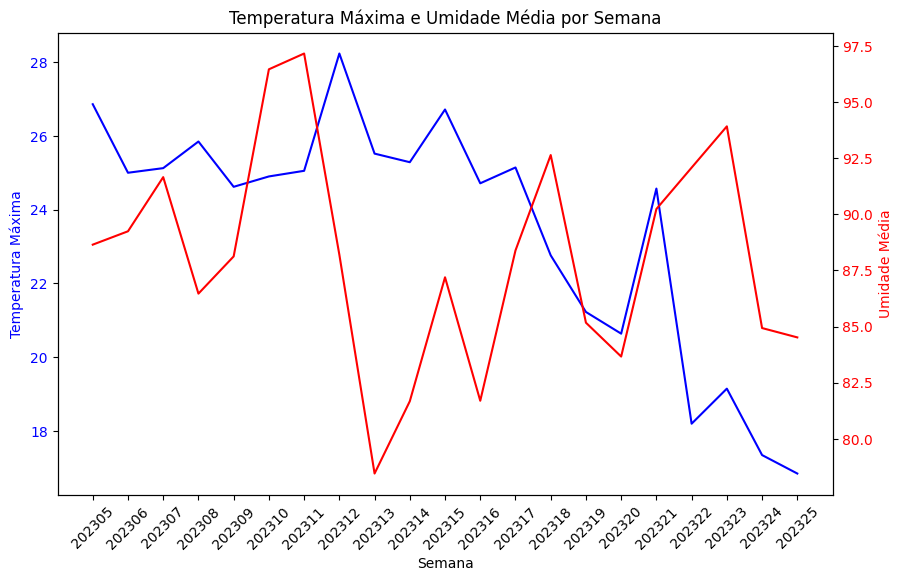

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar a temperatura máxima no primeiro eixo y
ax1.plot(filtered_data['SE'], filtered_data['tempmax'], color='blue')
ax1.set_xlabel('Semana')
ax1.set_ylabel('Temperatura Máxima', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar um segundo eixo y para a umidade média
ax2 = ax1.twinx()
ax2.plot(filtered_data['SE'], filtered_data['umidmed'], color='red')
ax2.set_ylabel('Umidade Média', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Temperatura Máxima e Umidade Média por Semana')
for label in ax1.get_xticklabels():
    label.set_rotation(45)
plt.show()

### Correlação de temperatura, umidade. Análise linear

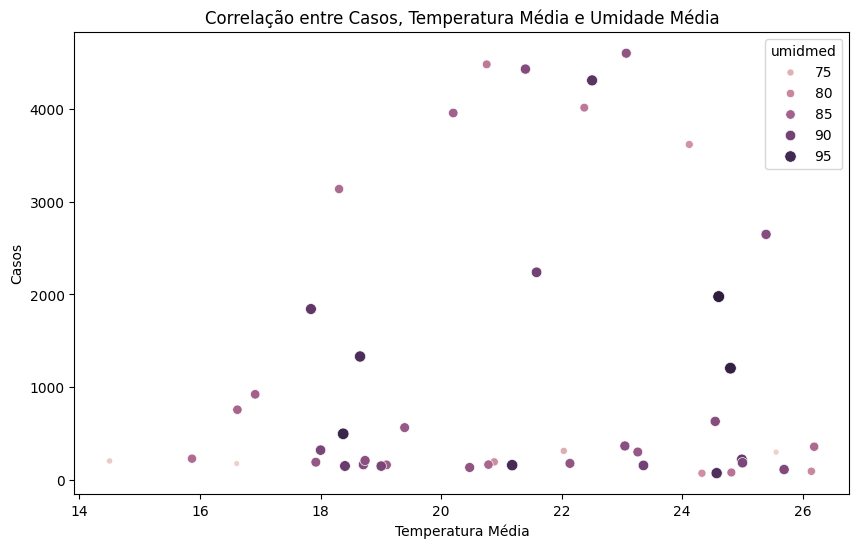

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plotar um gráfico de dispersão com a temperatura média e os casos
sns.scatterplot(x='tempmed', y='casos', hue='umidmed', size='umidmed', data=dados)

plt.xlabel('Temperatura Média')
plt.ylabel('Casos')
plt.title('Correlação entre Casos, Temperatura Média e Umidade Média')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as variáveis independentes
X = dados[['tempmed', 'umidmed']]

# Preencher os valores faltantes com a média
X = X.fillna(X.median())

# Criar uma série com a variável dependente
y = dados['casos']

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados
model.fit(X, y)

# Imprimir os coeficientes do modelo
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -515.518574745776
Coefficients: [30.24858296 10.4058874 ]


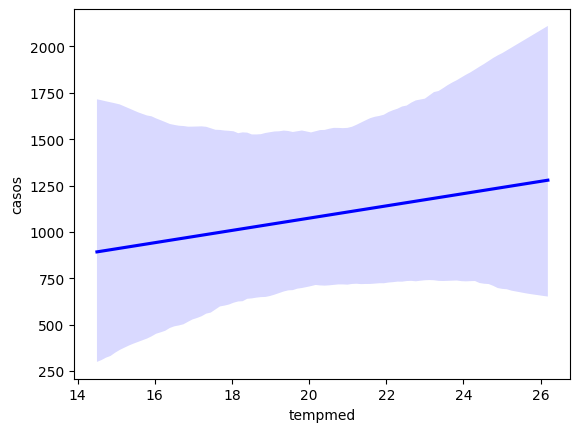

In [ ]:
#plote o gráfico de dispersão e a reta de regressão
# usando regplot

sns.regplot(x='tempmed', y='casos', data=dados, scatter=False, color='blue')   


plt.show()

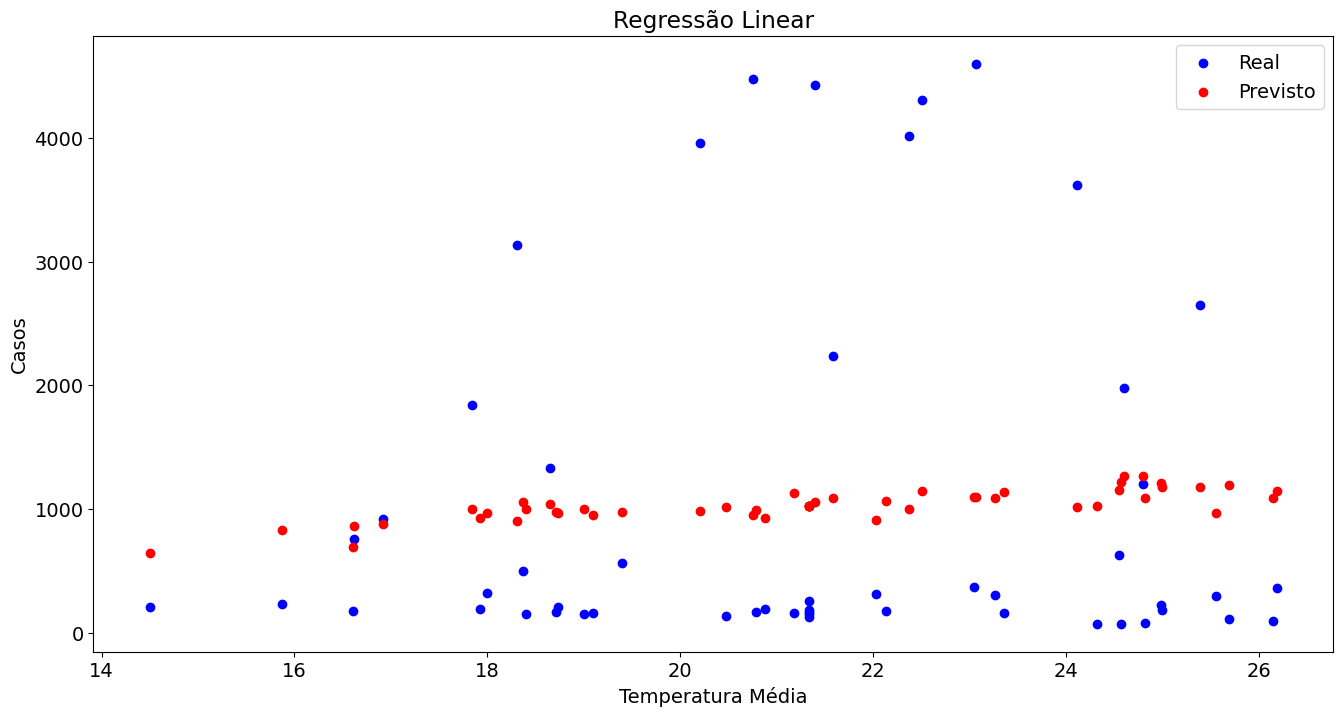

In [ ]:
from sklearn.linear_model import LinearRegression

# Criar um DataFrame com as variáveis independentes
X = dados[['tempmed', 'umidmed']]

# Preencher os valores faltantes com a média
X = X.fillna(X.mean())

# Criar uma série com a variável dependente
y = dados['casos']

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo aos dados
model.fit(X, y)

# Fazer previsões com o modelo
y_pred = model.predict(X)

# Criar uma figura
fig, ax = plt.subplots()

# Plotar os valores reais
ax.scatter(X['tempmed'], y, color='blue', label='Real')

# Plotar os valores previstos
ax.scatter(X['tempmed'], y_pred, color='red', label='Previsto')

# Adicionar legendas e título
ax.set_xlabel('Temperatura Média')
ax.set_ylabel('Casos')
ax.set_title('Regressão Linear')
ax.legend()

# Mostrar o gráfico
plt.show()

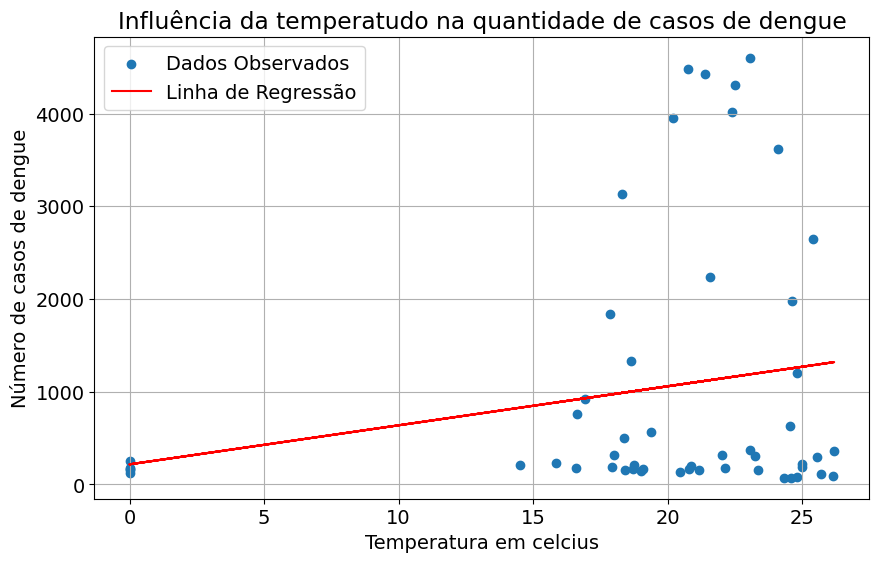

In [ ]:
import statsmodels.api as sm

x = dados['tempmed'].values
x = np.nan_to_num(x)

# Adicionando uma constante ao x para estimar o termo de interceptação
x = sm.add_constant(x)

y = dados['casos'].values

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, x).fit()

# Fazendo previsões
predicoes = modelo.predict(x)

# Plotando os dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 1], y, label='Dados Observados')
plt.plot(x[:, 1], predicoes, color='red', label='Linha de Regressão')
plt.xlabel('Temperatura em celcius')
plt.ylabel('Número de casos de dengue')
plt.title('Influência da temperatudo na quantidade de casos de dengue')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
%matplotlib inline


In [ ]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)


In [ ]:
x = dados['tempmed']
y = dados['casos']
y

SE
202352     299
202351     358
202350     366
202349     313
202348     256
202347     182
202346     156
202345     194
202344     159
202343     165
202342     162
202341     149
202340     164
202339     134
202338     178
202337     176
202336     154
202335     128
202334     170
202333     204
202332     150
202331     191
202330     209
202329     229
202328     321
202327     497
202326     564
202325     757
202324     923
202323    1331
202322    1843
202321    2239
202320    3137
202319    3957
202318    4309
202317    4431
202316    4482
202315    4602
202314    4015
202313    3618
202312    2648
202311    1977
202310    1205
202309     631
202308     301
202307     220
202306     185
202305     112
202304      93
202303      73
202302      80
202301      72
Name: casos, dtype: int64

In [ ]:
tem_zero = (dados['umidmed'] == 0).any()
print(tem_zero)

False


In [ ]:
prestige_model = ols("casos ~ tempmed + umidmed", data=dados).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  casos   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.1705
Date:                Thu, 04 Apr 2024   Prob (F-statistic):              0.844
Time:                        16:50:20   Log-Likelihood:                -409.27
No. Observations:                  47   AIC:                             824.5
Df Residuals:                      44   BIC:                             830.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -623.1236   3325.486     -0.187      0.8

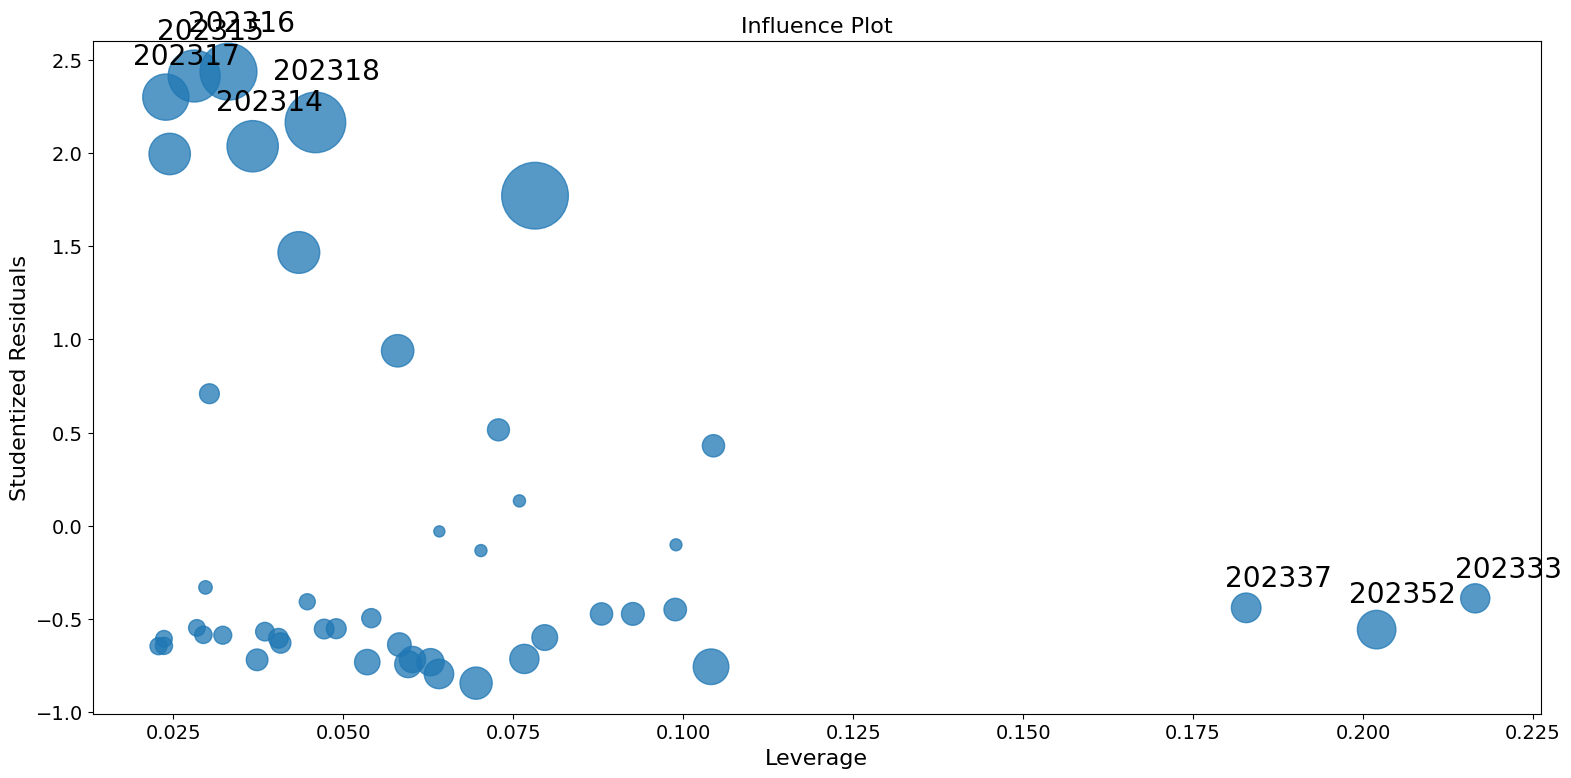

In [ ]:
fig = sm.graphics.influence_plot(prestige_model, criterion="cooks")
fig.tight_layout(pad=1.0)

Muito difícil de saber algo pois a correleção está dada em uma forma polinomial. 
Aplicar 

### Estudo sobre teorema central do limite e amostras

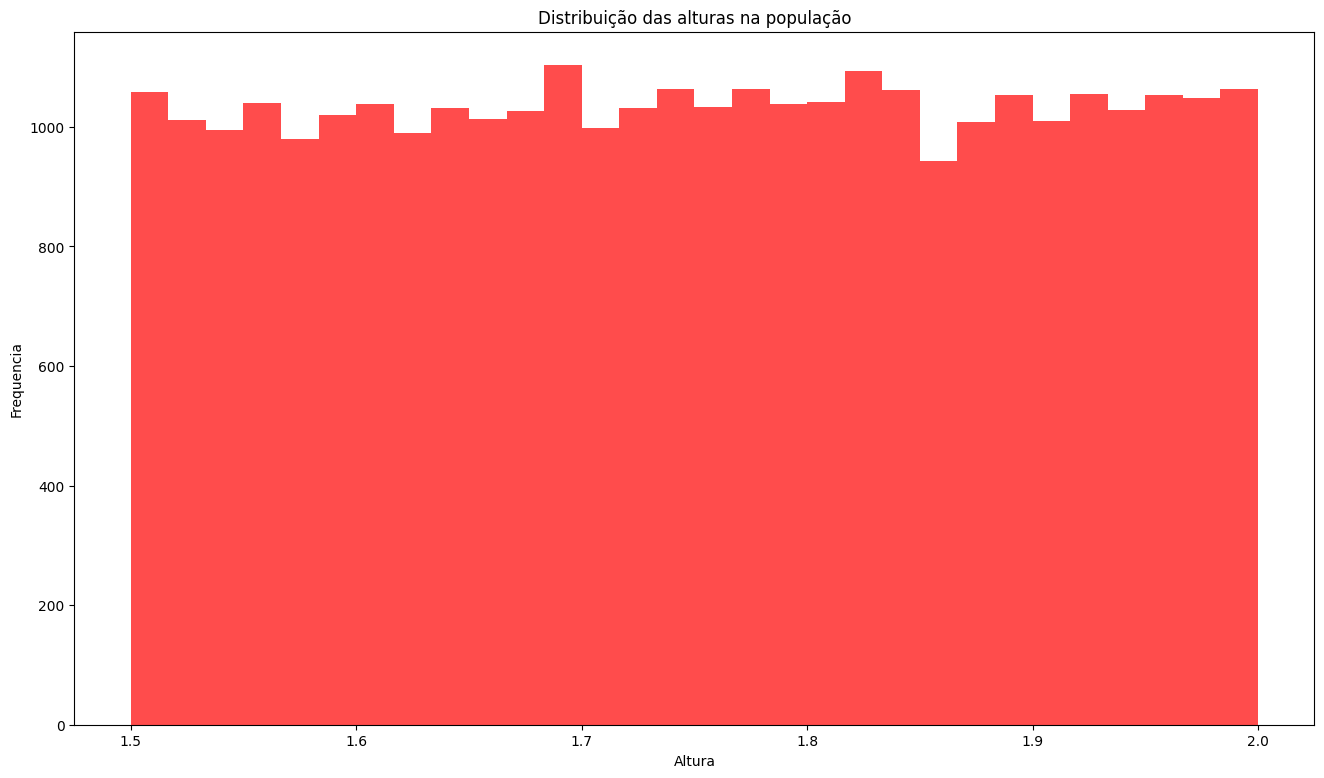

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

populacao = np.random.uniform(low= 1.5, high=2.0, size=31000)

plt.figure(figsize=(16,9))
plt.hist(populacao, bins=30, color='red', alpha=0.7)
plt.title('Distribuição das alturas na população')
plt.xlabel('Altura')
plt.ylabel('Frequencia')
plt.show()

In [ ]:
media_pop = np.mean(populacao)
desvio_padrao_pop = np.std(populacao)

# printando
print(f'A média da população é {media_pop:.2f}')
print(f'O desvio padrão da população é {desvio_padrao_pop:.2f}')

A média da população é 1.75
O desvio padrão da população é 0.14


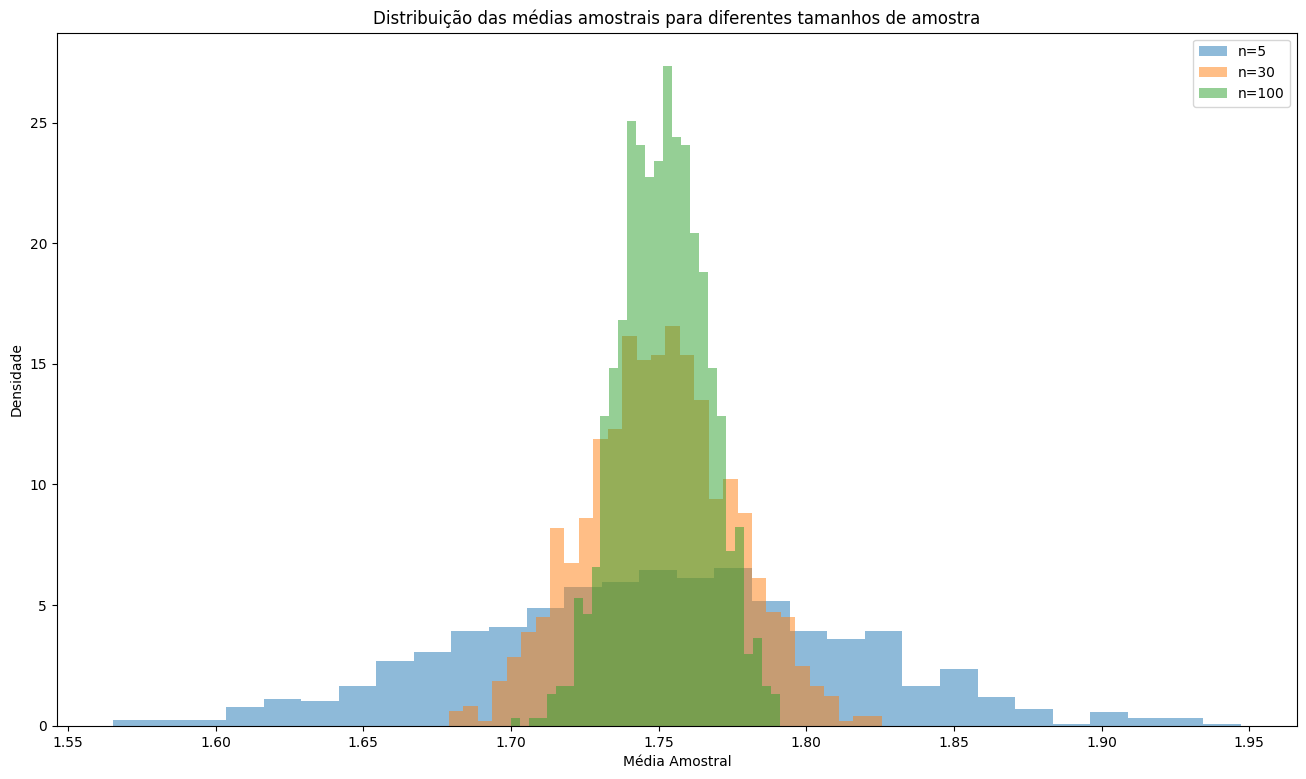

In [ ]:
plt.figure(figsize=(16,9))

# Definindo os diferentes tamanhos de amostra a serem utilizados
tamanhos_amostra = [5, 30, 100] 

# Criando um dicionário para armazenar os resultados
resultados = {}

# iterando para cada tamanho diferente de amostra
for n in tamanhos_amostra:
    # escolhe aleatoriamente n observações da pop. e calcula a média
    # o processo é repetido 1000 vezes
    medias_amostrais = [np.mean(np.random.choice(populacao, size=n)) for _ in range(1000)]
    
    # Calculando a média e desvio padrão para cada distribuição
    media_medias = np.mean(medias_amostrais)
    desvio_padrao_TCL = desvio_padrao_pop/np.sqrt(n) # desvio padrão seguindo a fórmula do TCL
    desvio_padrao_medias_amostrais = np.std(medias_amostrais)

    # Armazenando os resultados
    resultados[n] = (media_medias, desvio_padrao_TCL, desvio_padrao_medias_amostrais)
    
    # São gerados 3 histogramas, cada um para um diferente tamanho de amostra
    plt.hist(medias_amostrais, bins=30, density=True, alpha=0.5, label=f'n={n}')

plt.title('Distribuição das médias amostrais para diferentes tamanhos de amostra')
plt.xlabel('Média Amostral')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [ ]:
# Printando as médias e desvios padrão para cada tamanho de amostra
for tamanho, (media, desvio_padrao_TCL, desvio_padrao_medias_amostrais) in resultados.items():
    print(f"Tamanho da amostra: {tamanho}")
    print(f"Média das médias amostrais: {media:.4f}")
    print(f"Desvio padrão TCL: {desvio_padrao_TCL:.4f}")
    print(f"Desvio padrão das médias amostrais: {desvio_padrao_medias_amostrais:.4f}")
    print()

Tamanho da amostra: 5
Média das médias amostrais: 1.7500
Desvio padrão TCL: 0.0645
Desvio padrão das médias amostrais: 0.0638

Tamanho da amostra: 30
Média das médias amostrais: 1.7500
Desvio padrão TCL: 0.0263
Desvio padrão das médias amostrais: 0.0250

Tamanho da amostra: 100
Média das médias amostrais: 1.7517
Desvio padrão TCL: 0.0144
Desvio padrão das médias amostrais: 0.0148

